In [89]:
from matplotlib import pyplot as plt
from matplotlib import cm
import matplotlib.gridspec as gridspec
import glob, os
import numpy as np
import importlib
import wrftools as wrf
importlib.reload(wrf)
plt.rcParams['figure.facecolor'] = 'white'
#df0=pd.read_pickle("./df_run_CTRL.pkl")
dpath='../run'

rt='06' # landfall hour
z=2 # model level, 0 for surface, 10 m
dt=4 # tstep interval
t1=36 # last t step

run='run_land_t' + rt
fname='wrfout_d03_*'
flist=sorted(glob.glob(os.path.join(dpath,run,fname)))
flist=flist[0:t1:dt]
fnames=[os.path.basename(f) for f in flist]

zheights=wrf.getHeightCoord(flist[0])[:]
print(zheights[z-1])

r=wrf.getRcoord(flist[0])
zstr=str(round(zheights[z-1]))

50.026035


In [90]:
importlib.reload(wrf)
force=False
vt10az=[wrf.get_wrf(run,f,'vt',type='az',force=force,z=z) for f in fnames]
vr10az=[wrf.get_wrf(run,f,'vr',type='az',force=force,z=z) for f in fnames]
th10az=[wrf.get_wrf(run,f,'th',type='az',force=force,z=z) for f in fnames]
Psfcaz=[wrf.get_wrf(run,f,'P',type='az',force=force,z=z) for f in fnames]   

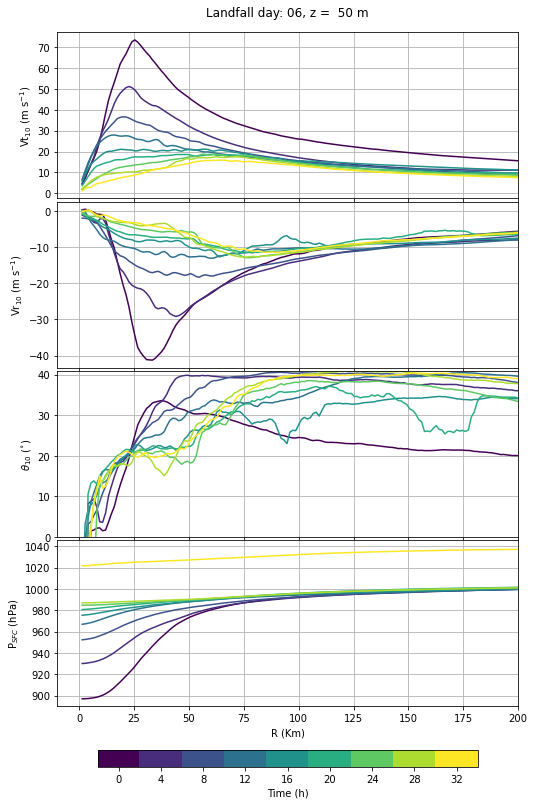

In [91]:
Pp=Psfcaz
vtp=vt10az
vrp=vr10az
thp=th10az
nlines=len(Pp)
cmap=cm.get_cmap('viridis',nlines)

#fig,axs=plt.subplots(3, 1, sharex='col',gridspec_kw={'height_ratios': [10, 10, 1]})
fig,(ax0,ax1,ax2,ax3)=plt.subplots(4, 1, sharex='col')

# Make dummie mappable for colorbar
t=np.arange(0,t1,dt)
c = np.arange(0, t[-1] + 1 +dt)-0.5*dt
cax = ax0.scatter(c, c, c=c, cmap=cmap)
ax0.cla()
 
for n, v in enumerate(vtp):
    h=ax0.plot(r,v,color=cmap(n));     
for n, v in enumerate(vrp):
    h=ax1.plot(r,v,color=cmap(n));    
for n, v in enumerate(thp):
    h=ax2.plot(r,v,color=cmap(n));
for n, v in enumerate(Pp):
    h=ax3.plot(r,v,color=cmap(n)); 
    
# ax0.set_ylabel('V$_{10}$ (m s$^{-1}$)')
ax0.set_ylabel('Vt$_{10}$ (m s$^{-1}$)')
ax1.set_ylabel('Vr$_{10}$ (m s$^{-1}$)')
ax2.set_ylabel('$\\theta_{10}$ ($^{\circ}$)')
ax3.set_ylabel('P$_{SFC}$ (hPa)')

ax3.set_xlabel('R (Km)')
ax3.set_xlim([-10,200])

ax0.grid(True)
ax1.grid(True)
ax2.grid(True)
ax3.grid(True)

th_x_range_low_cut=10
th_x_range_high_cut=150
thmin=max(-180,min(0,np.min((np.stack(thp)[:,th_x_range_low_cut:th_x_range_high_cut]))))
thmax=min(180,max(0,np.max((np.stack(thp)[:,th_x_range_cut:th_x_range_high_cut]))))
ax2.set_ylim((thmin, thmax))

fig.subplots_adjust(bottom=0.17, top=0.950, left=0.1, right=0.9,wspace=0.02, hspace=0.02)
cpax = fig.add_axes([0.17, 0.1, 0.66, 0.02])
cb=fig.colorbar(cax, cax=cpax,ax=[ax0, ax1, ax2, ax3],ticks=t, shrink=0.6, orientation="horizontal",use_gridspec=True)
cb.set_label('Time (h)')


if z==0:
    zout='Surface' 
else:
    zout=zstr + ' m'
        
tstr='Landfall day: ' + rt + ', z =  ' + zout
fig.suptitle(tstr)

fig.set_size_inches(8,12)  
#plt.tight_layout()
fig.savefig('LT' + rt + '_rad_profs_z'+ str(z) +'_.png',dpi=300,bbox_inches='tight', pad_inches=0.1,transparent=False)